

# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb).
It initially includes 21 columns but in this project, I will be working with 9 columns.
Columns : popularity,budget, revenue, original_title, director, runtime, genres, vote_count, release_year.

### Question(s) for Analysis

<ul>
    <li> The number of films isn't increase each year ? </li>
    <li> Which genres are most popular for each year ? </li>
    <li> What property of a film help increase the revenue ? </li>
</ul>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling


In [4]:
df=pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Dropping unnecessary columns from the dataset

In [5]:
df.drop(['id', 'imdb_id', 'cast','homepage','tagline','keywords','overview','production_companies','vote_average','revenue_adj','revenue_adj','release_date','budget_adj'], axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,2015


#### Discovering the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
release_year      10866 non-null int64
dtypes: float64(1), int64(5), object(3)
memory usage: 764.1+ KB


In [7]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,2015.000000


<font color='blue'> **We have 10866 entries and 9 columns.
Some missing values in both 'director' and 'genres' columns.**</font>


### Data Cleaning

In [8]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,2015


#### Droping null values

In [9]:
df.dropna(axis=0, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10801 non-null float64
budget            10801 non-null int64
revenue           10801 non-null int64
original_title    10801 non-null object
director          10801 non-null object
runtime           10801 non-null int64
genres            10801 non-null object
vote_count        10801 non-null int64
release_year      10801 non-null int64
dtypes: float64(1), int64(5), object(3)
memory usage: 843.8+ KB


<a id='eda'></a>
## Exploratory Data Analysis



### Q1: the number of films isn't increase each year ?

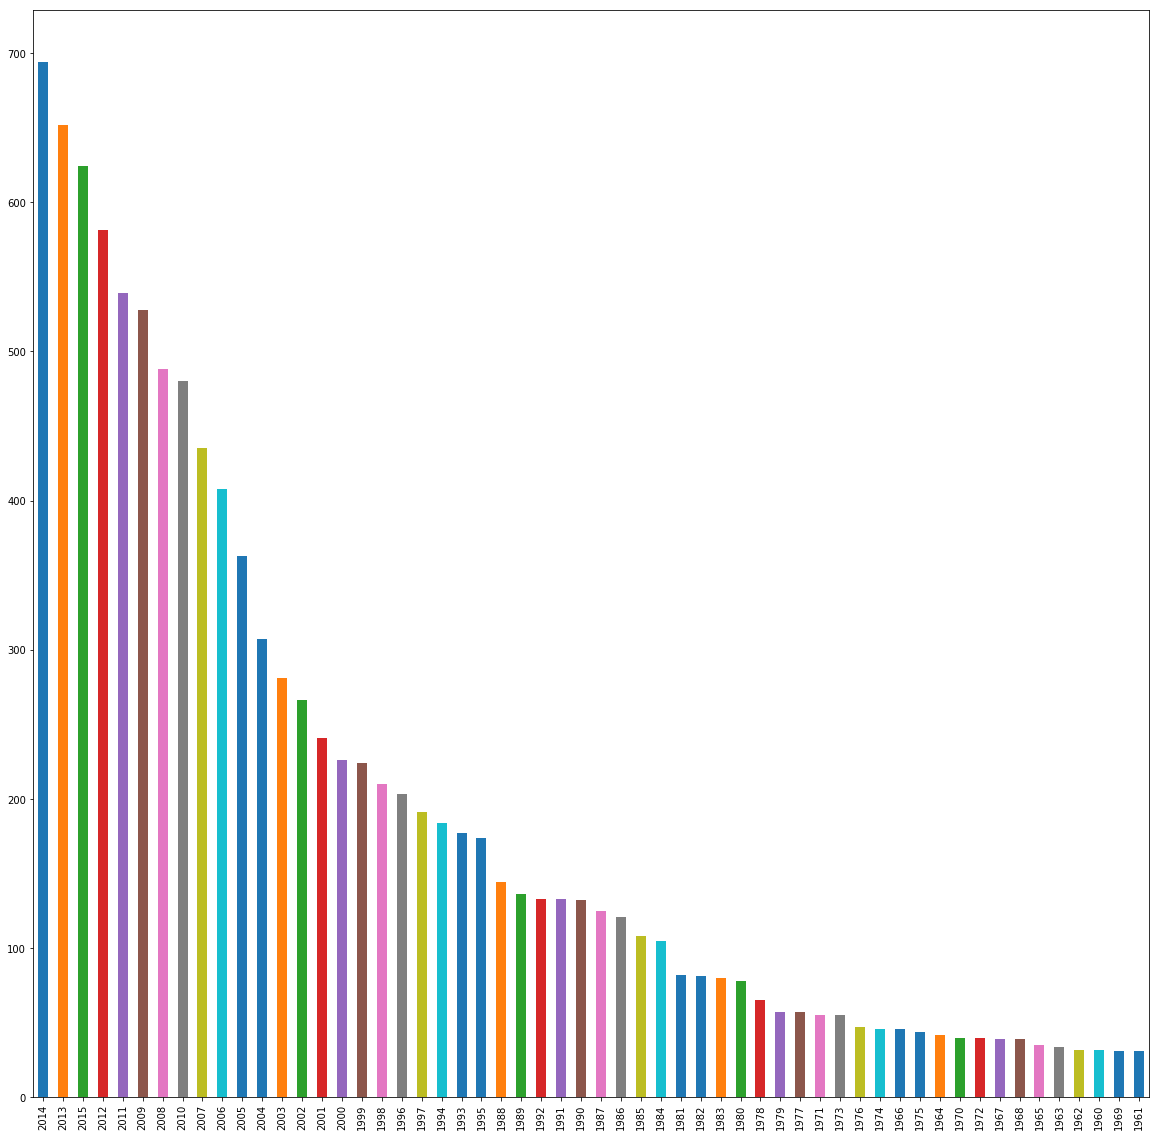

In [12]:
df['release_year'].value_counts().plot(kind='bar',figsize=(20,20));

<font color='blue'> **Number of films produced each year is in big increase from 2005** </font>

### Q2: Which genres are most popular for each year ?

***I will be groupping by 'release_year' and extracting for each year the 'genres' the most popular***

In [13]:
df_year=df.groupby("release_year")

In [14]:
top_genres={}
for i in range(1961,2016):
    s=df_year.get_group(i)
    d=s.loc[s['popularity'] == s['popularity'].max()]['genres']
    d=list(d)
    top_genres[i]=d[0]

***Turning the 'top_genres' dictionary into a pandas series***

In [32]:
genre_s = pd.Series(top_genres)
genre_s.value_counts()[[0,1,2]]

Adventure|Action|Thriller           4
Adventure|Fantasy|Action            4
Adventure|Action|Science Fiction    3
dtype: int64

<font color='Blue'> **Above we see the 3 most popular genres during the last 54 years.**
 **The 'Adventure|Action|Thriller' and 'Adventure|Fantasy|Action' genres are the most frequently popular genres for the last 54 years.**</font>

### Q3: What property of a film help increase the revenue ?

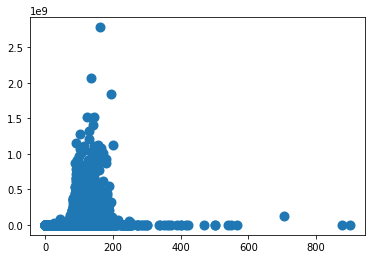

In [46]:
plt.scatter(df['runtime'],df['revenue'], linewidths = 4)

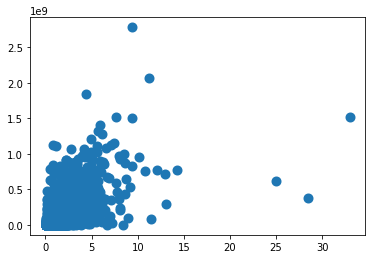

In [48]:
plt.scatter(df['popularity'],df['revenue'], linewidths = 4)

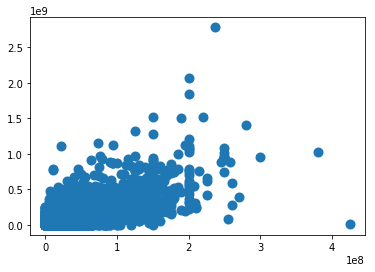

In [49]:
plt.scatter(df['budget'],df['revenue'], linewidths = 4)

<font color='Blue'> **The films with most 'revenue' have a 'runtime' between '100' and '200'. <br>
    there is no important relation between the budget,popularity and the revenue of a film**</font>

<a id='conclusions'></a>
## Conclusions

<ul>
   <li> The number of filmes produced each year are in increase year by year.</li>
<li>'Adventure|Fantasy|Action'and 'Adventure|Action|Thriller' are the most popular genres of films in the last 54 years.</li>
<li>Films with the highest revenue tend to to have a runtime of 100 to 200.</li>
<li>There is no important relation between the budget,popularity and the revenue of a film</li>
</ul>
